<a href="https://colab.research.google.com/github/AlexVonSchwerdtner/BA780-Team6/blob/main/Boston_Crime_Scene_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Welcome to Boston Crime Scene Analytics!</b></marquee>

#*BA780 - Team 6*
## Team Project - Exploratory Data Analysis


<img src="https://github.com/AlexVonSchwerdtner/BA780-Team6/blob/859eda2c400da728f46d9d541d23fb19c57805e3/Analyze%20Boston.png?raw=true" width="600" align="center"/>

*Image from [Analyze Boston](https://medium.com/news-stories-from-boston-open-data/official-launch-of-analyze-boston-coming-april-6th-b7513fd58aae)

---
#**Boston Crime Scene Analytics**
---

###*Problem definition:*

As current students living in the Boston Area we are interested in analyzing the Boston Crime Scene. We would like to analyze and discover what types of crimes are most common, where the different types of crimes are most likely to occur, and if the frequency of crimes change over specific time spans (e.g. day, week & year). Our mission is to answer questions like “where a person is most likely to be a victim of a crime at a certain time of day, specific months or seasons of a given year?”

## **Data**
*Crime Incident Reports (August 2015 - To Date)*

The Data was downloaded from [Analyze Boston](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)

*Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.*

Each row represents a specific crime incident, each column contains crime incident attributes described as below:

**REVISE**

* **INCIDENT_NUMBER**: Customer ID
* **OFFENSE_CODE_GROUP**: OFFENSE_CODE_GROUP
* **OFFENSE_DESCRIPTION**: OFFENSE_DESCRIPTION
* **DISTRICT**: DISTRICT
* **REPORTING_AREA**: REPORTING_AREA
* **SHOOTING**: SHOOTING
* **OCCURRED_ON_DATE**: OCCURRED_ON_DATE **REVISE** changed to TIMESTAMP
* **YEAR**: YEAR
* **MONTH**: MONTH
* **DAY_OF_WEEK**: DAY_OF_WEEK
* **HOUR**: HOUR
* **UCR_PART**: UCR_PART
* **STREET**: STREET
* **Lat**: Lat
* **Long**: Long
* **Long**: Location

The data set includes information about:

* **EXPLANATION HOW WE TREAT YEARS 2015 & 2019 (incomplete DATA)**
* Excluding 2015, for 2019 change in Data System (CHECK) --> for season by year we only 

* `xxx`


We will be using Python and Seaborn library to plot and analyze the data.

**Basic information**:

*Crime Dataset*
* 494,251 rows
* There are 20 columns
* **REVISE**

*Offense Codes Dataset*
* 425 rows
* There are 2 columns with Code and Name
* No missing values in this dataset
**REVISE**

*Holiday Dataset*
* ... rows
* There are .... columns with .....
* No missing values in this dataset
**REVISE**

# **Setup**

## *Importing Required Packages*

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
%matplotlib inline
pd.set_option('display.max_rows',5)
pd.set_option('display.max_columns',5)

## *Reading all files to the environment from GoogleCloudStorage Bucket*

In [339]:
from google.cloud import storage
from google.colab import auth
auth.authenticate_user()

In [340]:
def download_blob(file_name):
    """Downloads a blob from the bucket."""
    project_id = 'ba-780-team6-a1'
    bucket_name = 'ba780-team6-a1'

    storage_client = storage.Client(project_id)

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(file_name)
    blob.download_to_filename(file_name)

    print(
        "Blob {} downloaded to {}.".format(
            file_name, file_name
        )
    )
download_blob('rmsoffensecodes.xlsx')
#download_blob('crime-incident-reports-2015.csv')
download_blob('crime-incident-reports-2016.csv')
download_blob('crime-incident-reports-2017.csv')
download_blob('crime-incident-reports-2018.csv')
download_blob('crime-incident-reports-2019.csv')
download_blob('crime-incident-reports-2020.csv')
download_blob('crime-incident-reports-2021.csv')
download_blob('US Holiday Dates (2004-2021).csv')

Blob rmsoffensecodes.xlsx downloaded to rmsoffensecodes.xlsx.
Blob crime-incident-reports-2016.csv downloaded to crime-incident-reports-2016.csv.
Blob crime-incident-reports-2017.csv downloaded to crime-incident-reports-2017.csv.
Blob crime-incident-reports-2018.csv downloaded to crime-incident-reports-2018.csv.
Blob crime-incident-reports-2019.csv downloaded to crime-incident-reports-2019.csv.
Blob crime-incident-reports-2020.csv downloaded to crime-incident-reports-2020.csv.
Blob crime-incident-reports-2021.csv downloaded to crime-incident-reports-2021.csv.
Blob US Holiday Dates (2004-2021).csv downloaded to US Holiday Dates (2004-2021).csv.


## *Loading Data to variables*

In [341]:
# reading the crime data sets to the environement
import pandas as pd
#crimes2015 = pd.read_csv('crime-incident-reports-2015.csv')
crimes2016 = pd.read_csv('crime-incident-reports-2016.csv')
crimes2017 = pd.read_csv('crime-incident-reports-2017.csv')
crimes2018 = pd.read_csv('crime-incident-reports-2018.csv')
crimes2019 = pd.read_csv('crime-incident-reports-2019.csv')
crimes2020 = pd.read_csv('crime-incident-reports-2020.csv')
crimes2021 = pd.read_csv('crime-incident-reports-2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [342]:
# reading the offense codes to the environment
offense_codes = pd.read_excel('rmsoffensecodes.xlsx')

In [343]:
# reading the US holidays to the environment
holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')

## *Concatenating all crime datasets (Years 2016 - 2021)*

In [344]:
# concatenating all crime datasets (excluded crimes2015)
frames = [crimes2016,crimes2017,crimes2018,crimes2019,crimes2020,crimes2021]
Crimes_all_years = pd.concat(frames)
Crimes_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440684 entries, 0 to 50351
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      440684 non-null  object 
 1   OFFENSE_CODE         440684 non-null  int64  
 2   OFFENSE_CODE_GROUP   299656 non-null  object 
 3   OFFENSE_DESCRIPTION  440684 non-null  object 
 4   DISTRICT             437693 non-null  object 
 5   REPORTING_AREA       440684 non-null  object 
 6   SHOOTING             142232 non-null  object 
 7   OCCURRED_ON_DATE     440684 non-null  object 
 8   YEAR                 440684 non-null  int64  
 9   MONTH                440684 non-null  int64  
 10  DAY_OF_WEEK          440684 non-null  object 
 11  HOUR                 440684 non-null  int64  
 12  UCR_PART             299561 non-null  object 
 13  STREET               430070 non-null  object 
 14  Lat                  420282 non-null  float64
 15  Long              

In [345]:
# EXPORT TO CSV
Crimes_all_years.to_csv('crimes_all_years.csv')

# **Data Cleaning**

### Data Cleaning in Offense Code Dataset

In [ ]:
# Number of unique offense codes
len(offense_codes['CODE'].unique())

425

In [ ]:
# checking for duplicates
print(len(offense_codes))
print(len(offense_codes.drop_duplicates(subset='CODE', keep='first')))

576
425


In [ ]:
offense_codes.duplicated

<bound method DataFrame.duplicated of      CODE                                       NAME
0     612           LARCENY PURSE SNATCH - NO FORCE 
1     613                        LARCENY SHOPLIFTING
..    ...                                        ...
574  2010                              HOME INVASION
575  1620  HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE

[576 rows x 2 columns]>

In [ ]:
duplicated_codes = offense_codes[offense_codes.duplicated()]
duplicated_codes

,CODE,NAME
184,112,KILLING OF FELON BY POLICE
185,114,KILLING OF POLICE BY FELON
...,...,...
565,2608,CHINS
569,2631,PROPERTY - CONCEALING LEASED


### Data Cleaning in Crime Dataset

In [346]:
# Number of unique crime incidents
len(Crimes_all_years['INCIDENT_NUMBER'].unique())

405242

In [347]:
# checking for duplicates
print(len(Crimes_all_years))
print(len(Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first')))

440684
405242


In [348]:
# dropping duplicates
Crimes_all_years = Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first').reset_index()
print(len(Crimes_all_years))

405242


In [349]:
# filling the NA's in the 'OFFENSE_CODE_GROUP' with non-na 'OFFENSE_CODE_GROUP' of the same 'OFFENSE_CODE' previously used
OFFENSE_CODE = Crimes_all_years[Crimes_all_years.OFFENSE_CODE_GROUP.isna()==False]
OFFENSE_CODE = OFFENSE_CODE.drop_duplicates(subset='OFFENSE_CODE', keep='first').reset_index()
OFFENSE_CODE = OFFENSE_CODE[['OFFENSE_CODE','OFFENSE_CODE_GROUP']]
Crimes_all_years = Crimes_all_years.merge(OFFENSE_CODE,on='OFFENSE_CODE',how='left')
Crimes_all_years['OFFENSE_CODE_GROUP']=Crimes_all_years.OFFENSE_CODE_GROUP_y
Crimes_all_years = Crimes_all_years.drop(columns=['OFFENSE_CODE_GROUP_x','OFFENSE_CODE_GROUP_y'])
print(len(Crimes_all_years))

405242


In [350]:
# missing values in Lat column
Crimes_all_years[Crimes_all_years['Lat'].isnull()]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
21,25,I192029756,...,"(0.00000000, 0.00000000)",Property Lost
70,75,I182056106,...,"(0.00000000, 0.00000000)",Fraud
...,...,...,...,...,...
264187,98803,I172002908,...,"(0.00000000, 0.00000000)",Simple Assault
264211,98873,I110611058-00,...,"(0.00000000, 0.00000000)",Warrant Arrests


In [351]:
# missing values in Long column
Crimes_all_years[Crimes_all_years['Long'].isnull()]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
21,25,I192029756,...,"(0.00000000, 0.00000000)",Property Lost
70,75,I182056106,...,"(0.00000000, 0.00000000)",Fraud
...,...,...,...,...,...
264187,98803,I172002908,...,"(0.00000000, 0.00000000)",Simple Assault
264211,98873,I110611058-00,...,"(0.00000000, 0.00000000)",Warrant Arrests


In [352]:
# missing values in DISTRICT column
Crimes_all_years[Crimes_all_years['DISTRICT'].isnull()]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
13,16,I192043111,...,"(42.35183419, -71.11076425)",Fraud
66,71,I182059591,...,"(-1.00000000, -1.00000000)",Fraud
...,...,...,...,...,...
405218,50328,210026907,...,"(42.3296947119465, -71.0704440989647)",Drug Violation
405233,50343,201906722,...,"(0, 0)",Other


In [353]:
# adding SEASON column
Crimes_all_years['SEASON']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([3,4,5]),'SEASON']='Spring'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([6,7,8]),'SEASON']='Summer'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([9,10,11]),'SEASON']='Fall'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12,1,2]),'SEASON']='Winter'
#print(len(Crimes_all_years))

In [354]:
# transforming OCCURRED_ON_DATE from str to timestemp.date
def date(time):
    return time.date()

Crimes_all_years['OCCURRED_ON_DATE']=pd.to_datetime(Crimes_all_years['OCCURRED_ON_DATE'],format='%Y-%m-%d %H:%M:%S')
Crimes_all_years['OCCURRED_ON_DATE']=Crimes_all_years['OCCURRED_ON_DATE'].apply(date)
print(len(Crimes_all_years.OCCURRED_ON_DATE))

405242


In [355]:
# adding Holiday columns (showing the name of holiday if exists, otherwise missing value)
holidays = holidays[['Date','Holiday']]
holidays['Date'] = pd.to_datetime(holidays['Date'],format='%Y-%m-%d')
holidays['Date'] = holidays['Date'].apply(date)
Crimes_all_years = Crimes_all_years.merge(holidays, left_on='OCCURRED_ON_DATE',right_on='Date',how='left')

print(len(Crimes_all_years.OCCURRED_ON_DATE))

405469


In [356]:
crimes_holiday=Crimes_all_years[Crimes_all_years.Holiday.isna()==False].groupby('Holiday').INCIDENT_NUMBER.agg(count = 'count').sort_values(by='count',ascending=False)
crime_holiday

,count
Holiday,
Labor Day Weekend,2250
New Year's Day,1210
...,...
Christmas Day,639
Thanksgiving Day,620


In [357]:
Crimes_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405469 entries, 0 to 405468
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                405469 non-null  int64  
 1   INCIDENT_NUMBER      405469 non-null  object 
 2   OFFENSE_CODE         405469 non-null  int64  
 3   OFFENSE_DESCRIPTION  405469 non-null  object 
 4   DISTRICT             402663 non-null  object 
 5   REPORTING_AREA       405469 non-null  object 
 6   SHOOTING             141600 non-null  object 
 7   OCCURRED_ON_DATE     405469 non-null  object 
 8   YEAR                 405469 non-null  int64  
 9   MONTH                405469 non-null  int64  
 10  DAY_OF_WEEK          405469 non-null  object 
 11  HOUR                 405469 non-null  int64  
 12  UCR_PART             264371 non-null  object 
 13  STREET               396382 non-null  object 
 14  Lat                  387973 non-null  float64
 15  Long             

# **Exploration**

## General

In [ ]:
dftop6 = Crimes_all_years.groupby('OFFENSE_CODE_GROUP').size().to_frame('count').sort_values(by='count', ascending=False).head(6).reset_index()
dftop6 = dftop6.drop([5])
dftop6

,OFFENSE_CODE_GROUP,count
0,Motor Vehicle Accident Response,52681
1,Larceny,34297
2,Medical Assistance,30400
3,Investigate Person,28380
4,Vandalism,19605


In [ ]:
# number of crimes over offense groups by year

df = Crimes_all_years.groupby(['YEAR','OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index()
df = df.sort_values(by=['YEAR','INCIDENT_NUMBER'], ascending=False)
df = df[df['OFFENSE_CODE_GROUP'].isin(dftop6.OFFENSE_CODE_GROUP)]

df[df['YEAR']==2020]

,YEAR,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
278,2020.0,Motor Vehicle Accident Response,8409
270,2020.0,Larceny,6250
267,2020.0,Investigate Person,5122
275,2020.0,Medical Assistance,4256
297,2020.0,Vandalism,3420


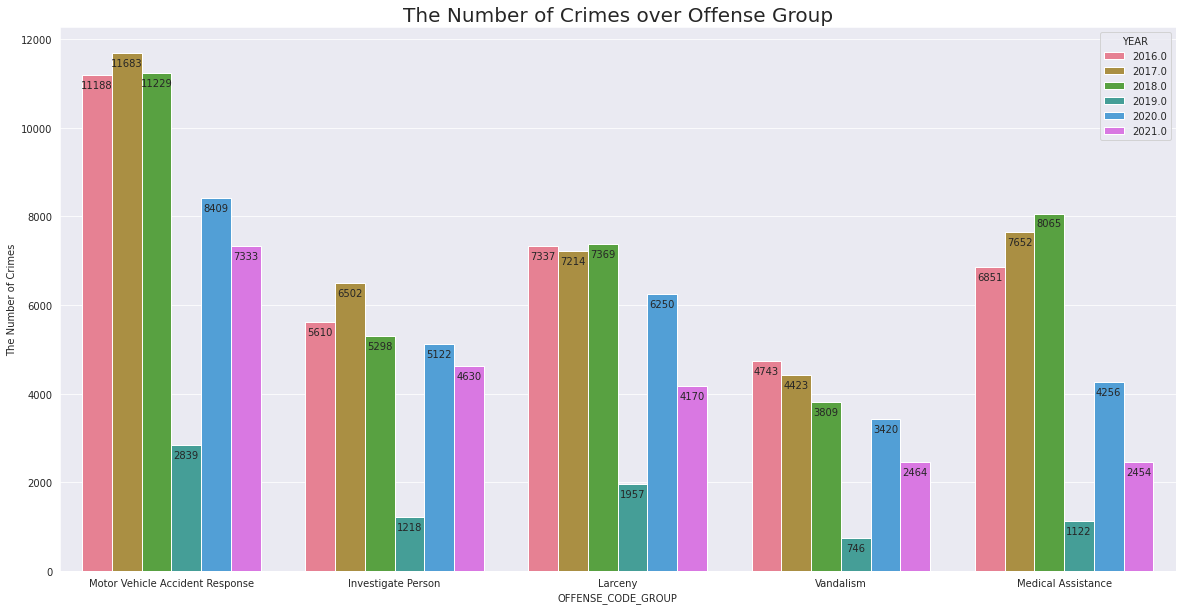

In [ ]:
plt.figure(figsize= (20,10))
fig1 = sns.barplot(data=df, x='OFFENSE_CODE_GROUP', y='INCIDENT_NUMBER', hue='YEAR')
plt.ylabel('The Number of Crimes')
plt.title('The Number of Crimes over Offense Group', fontsize=20)

for i in fig1.patches:
    fig1.annotate(format(int(i.get_height())), 
                   (i.get_x() + i.get_width() / 2, i.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    
plt.show()

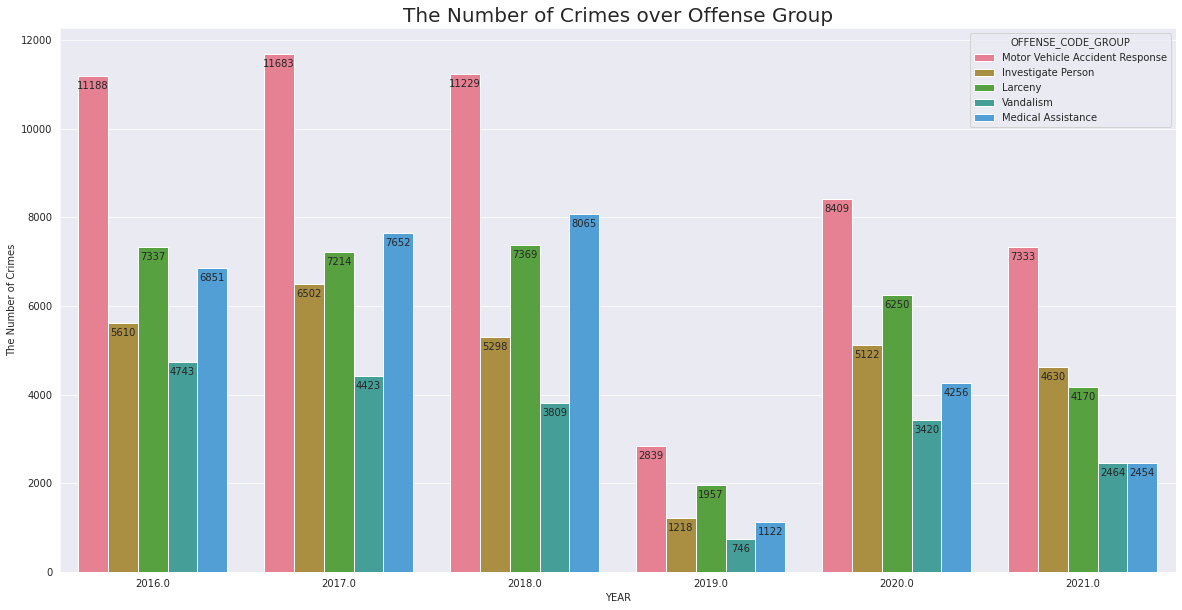

In [ ]:
plt.figure(figsize= (20,10))
fig2 = sns.barplot(data=df, x='YEAR', y='INCIDENT_NUMBER', hue='OFFENSE_CODE_GROUP')
plt.ylabel('The Number of Crimes')
plt.title('The Number of Crimes over Offense Group', fontsize=20)

for i in fig2.patches:
    fig2.annotate(format(int(i.get_height())), 
                   (i.get_x() + i.get_width() / 2, i.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    
plt.show()

## By Hour and Weekday

###During which time do criminal cases frequently occur？

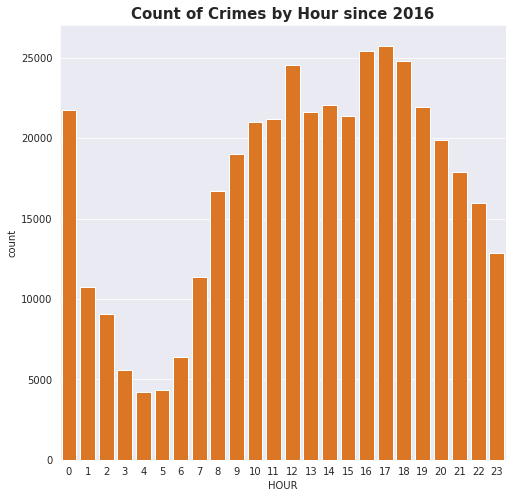

In [409]:
crimes_hour = Crimes_all_years.groupby('HOUR').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
sns.set_style('darkgrid')
ax = sns.barplot(data=crimes_hour,x='HOUR',y='count',color='#F97306')
sns.set_context({"figure.figsize":(8,8)})
ax.set_title('Count of Crimes by Hour since 2016',fontdict= {'fontsize':15, 'fontweight':'bold'});

*   From the hourly crime count bar chart above, it is obvious that crimes more often occurred during daytimes than nighttimes, especially at 12 pm and 16-18 pm. Also, 0 am was the most frequent hour for crime reports at night.

###Did this pattern vary a lot in different years?

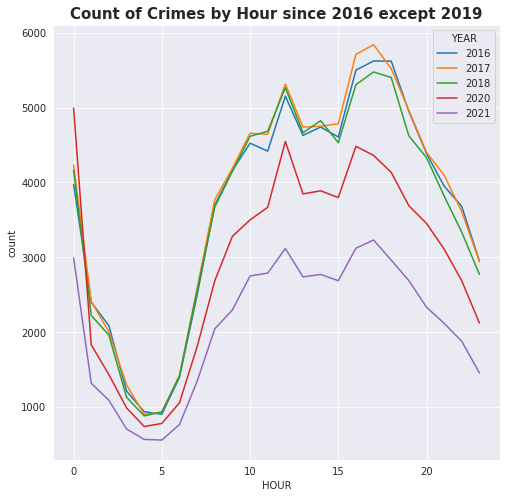

In [416]:
crimes_hour = Crimes_all_years[Crimes_all_years.YEAR!=2019].groupby(['HOUR','YEAR']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
ax = sns.lineplot(data=crimes_hour,x='HOUR',y='count',hue='YEAR',palette='tab10')
sns.set_context({"figure.figsize":(8,8)})
ax.set_title('Count of Crimes by Hour since 2016 except 2019', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   From the above line chart, 2016 to present, except 2019 which is excluded because of missing data, generally have the same pattern on active hour of crime cases. 



###During which day of week do criminal cases frequently occur？

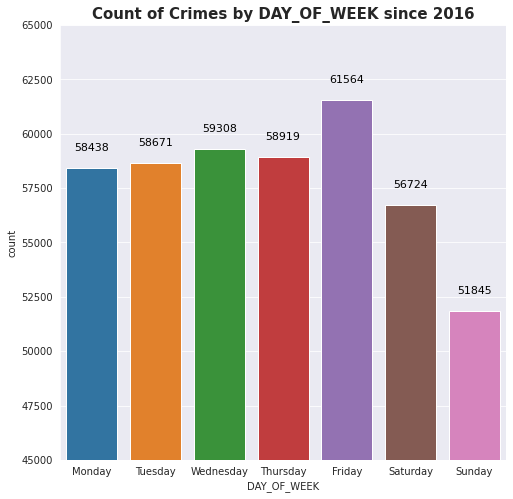

In [417]:
crimes_weekday = Crimes_all_years.groupby('DAY_OF_WEEK').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
crimes_weekday = crimes_weekday.reindex([4,3,1,2,0,5,6])
sns.set_palette('bright')
ax = sns.barplot(data=crimes_weekday,x='DAY_OF_WEEK',y='count',palette='tab10')
ax.set_title('Count of Crimes by DAY_OF_WEEK since 2016', fontdict= {'fontsize':15, 'fontweight':'bold'})
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set_ylim(45000,65000);


*   From the day_of_week crime count above, we can see that Friday had the most crime cases where there were less cases on weekend.



###Did this pattern vary a lot in different years?

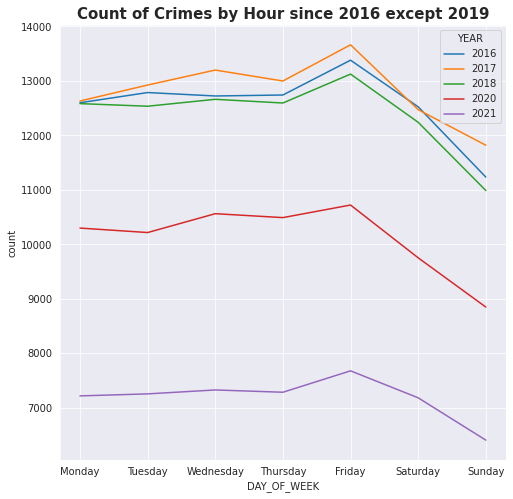

In [418]:
crimes_weekday = Crimes_all_years[Crimes_all_years.YEAR!=2019].groupby(['DAY_OF_WEEK','YEAR']).size().to_frame('count')
def sort():
    weekday= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    YEAR = [2016, 2017, 2018, 2020, 2021]
    return [(i,j) for i in weekday for j in YEAR]
crimes_weekday = crimes_weekday.reindex(sort())
ax = sns.lineplot(data=crimes_weekday,x='DAY_OF_WEEK',y='count',hue='YEAR',palette='tab10')
ax.set_title('Count of Crimes by Hour since 2016 except 2019', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   From the above line chart, 2016 to present, except 2019 which is excluded because of missing data, generally have the same pattern on active hour of crime cases. 



###What were the most dangerous hours on certain days of a week?

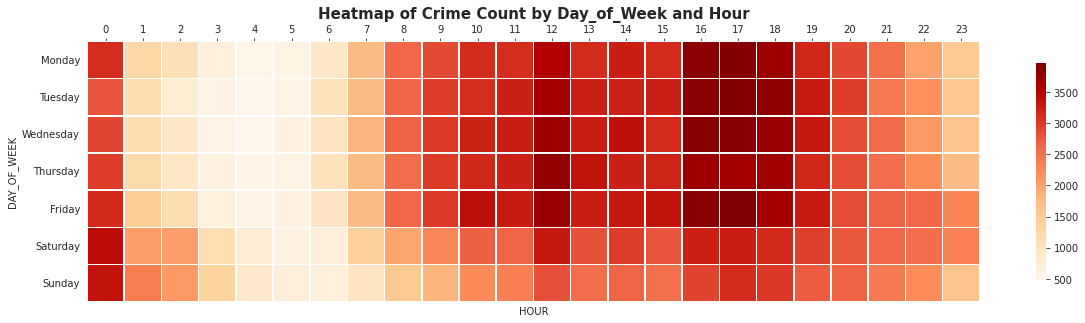

In [433]:
sns.set_context({"figure.figsize":(20,5)})
crimes_weekday_hour = Crimes_all_years.groupby(['DAY_OF_WEEK','HOUR']).INCIDENT_NUMBER.aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.8}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Day_of_Week and Hour', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   The heatmap shows that crimes frequently occured durring daytime on weekdays, especially at 12pm and between 16 and 18 pm. In weekends, 0 am had the largest number of crimes. 



## By Season

###Which season had the most crimes?

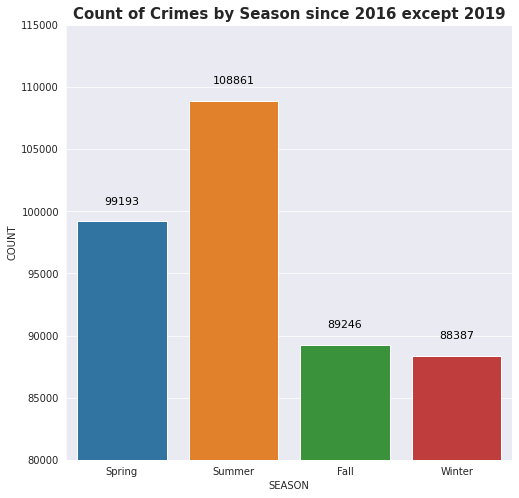

In [440]:
sns.set_context({"figure.figsize":(8,8)})
crimes_season = Crimes_all_years[Crimes_all_years.YEAR!=2019].groupby('SEASON')['index'].agg(count='count')
crimes_season = crimes_season.reindex(['Spring','Summer','Fall','Winter'])
crimes_season = pd.DataFrame({'SEASON':crimes_season.index,'COUNT':crimes_season['count']})
ax = sns.barplot(x=crimes_season.SEASON,y=crimes_season.COUNT,palette='tab10')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(80000, 115000))
ax.set_title('Count of Crimes by Season since 2016 except 2019', fontdict= {'fontsize':15, 'fontweight':'bold'});


*   In general, crimes occurred more in Summer and Spring.



###What were the most dangerous hours in a specific season?

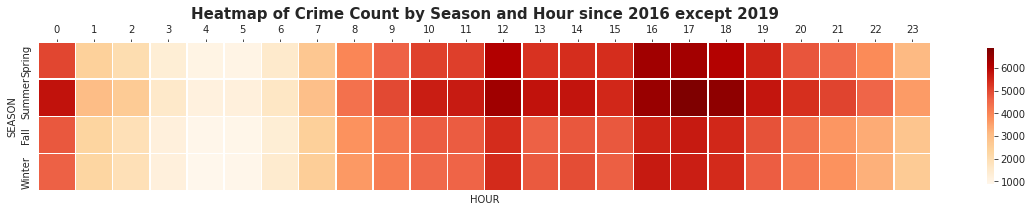

In [438]:
sns.set_context({"figure.figsize":(20,5)})
crimes_season_hour = Crimes_all_years[Crimes_all_years.YEAR!=2019].groupby(['SEASON','HOUR']).INCIDENT_NUMBER.aggregate('count').unstack()
crimes_season_hour = crimes_season_hour.reindex(['Spring','Summer','Fall','Winter'])
ax = sns.heatmap(crimes_season_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.5}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Season and Hour since 2016 except 2019', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   The most frequent times for crimes in terms of season and hour were noon and evening in Spring and Sumemr, and midnight in Summer.



## By Year

###A general overview of crime cases in different years

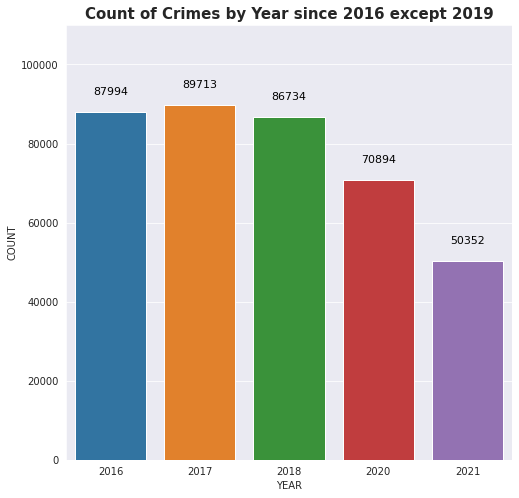

In [441]:
sns.set_context({"figure.figsize":(8,8)})
crimes_year = Crimes_all_years[Crimes_all_years.YEAR!=2019].groupby('YEAR').INCIDENT_NUMBER.agg(count='count')
crimes_year = pd.DataFrame({'YEAR':crimes_year.index,'COUNT':crimes_year['count']})
ax = sns.barplot(x=crimes_year.YEAR,y=crimes_year.COUNT,palette='tab10')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(0, 110000))
ax.set_title('Count of Crimes by Year since 2016 except 2019', fontdict= {'fontsize':15, 'fontweight':'bold'});

## By Holiday



*   Although 2019 is not showed, it is clear that the crime cases decreased since 2020, probably due to the COVID-19 pendamic.



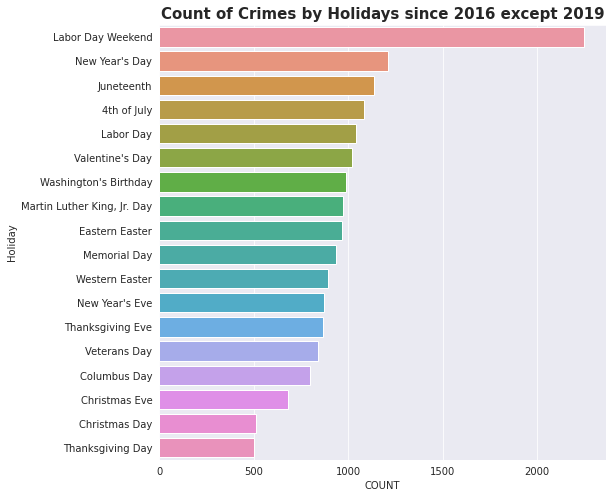

In [444]:
crimes_holiday=Crimes_all_years[(Crimes_all_years.YEAR!=2019) & (Crimes_all_years.Holiday.isna()==False)].groupby('Holiday').INCIDENT_NUMBER.agg(count = 'count').sort_values(by='count',ascending=False)

crimes_holiday = pd.DataFrame({'Holiday':crimes_holiday.index,'COUNT':crimes_holiday['count']})
ax = sns.barplot(y=crimes_holiday.Holiday,x=crimes_holiday.COUNT)
#for p in ax.patches:
#    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
#                textcoords='offset points')
ax.set_title('Count of Crimes by Holidays since 2016 except 2019', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   Since 2016 except 2019, Labor Day Weekend has the largest number of crime cases, while Cristmas and Tranksgiving have few crime cares.



## By Offense Type

###What were the most commonly occurred crimes?

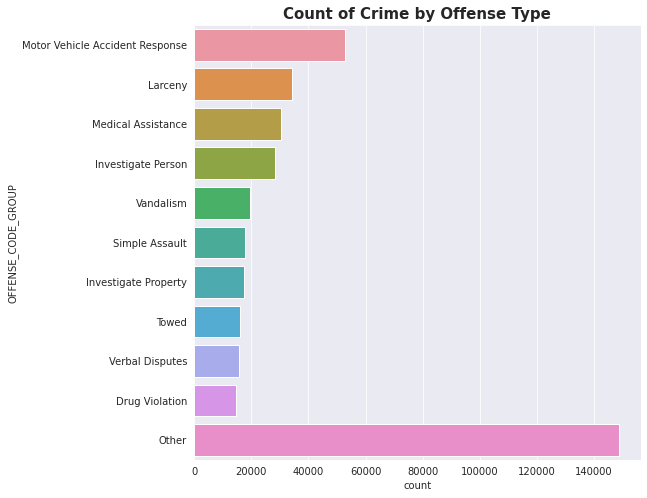

In [516]:
crimes_rank = Crimes_all_years.groupby('OFFENSE_CODE_GROUP').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
crimes_rank_10 = crimes_rank[crimes_rank.OFFENSE_CODE_GROUP!='Other'][:10]
other = sum(crimes_rank['count'])-sum(crimes_rank_10['count'])
crimes_rank_10 = pd.concat([crimes_rank_10,pd.DataFrame({'OFFENSE_CODE_GROUP':['Other'],'count':[other]})],ignore_index=True)
ax = sns.barplot(data=crimes_rank_10,y='OFFENSE_CODE_GROUP',x='count')
ax.set_title('Count of Crime by Offense Type', fontdict= {'fontsize':15, 'fontweight':'bold'});

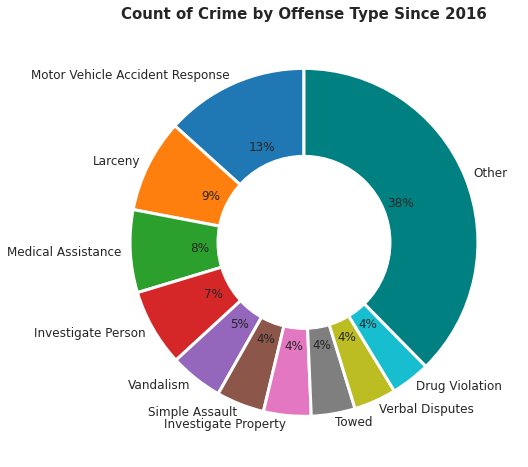

In [522]:
crimes_rank = Crimes_all_years.groupby('OFFENSE_CODE_GROUP').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
crimes_rank_10 = crimes_rank[crimes_rank.OFFENSE_CODE_GROUP!='Other'][:10]
other = sum(crimes_rank['count'])-sum(crimes_rank_10['count'])
crimes_rank_10 = pd.concat([crimes_rank_10,pd.DataFrame({'OFFENSE_CODE_GROUP':['Other'],'count':[other]})],ignore_index=True)
plt.pie(crimes_rank_10['count'],labels=crimes_rank_10.OFFENSE_CODE_GROUP,startangle=90, labeldistance=1.05,\
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },\
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#008080'],\
        textprops={'fontsize': 12},autopct='%1.0f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Count of Crime by Offense Type Since 2016', fontdict= {'fontsize':15, 'fontweight':'bold'})
plt.show()



*   According to the donnut chart, Motor Vehicle Accident Response, Larceny, Medical Assistance were the top-3 crime report cases since 2016.



###Motor Vehicle Accidents, the most frequent case type, were more likely to be reported at what time?

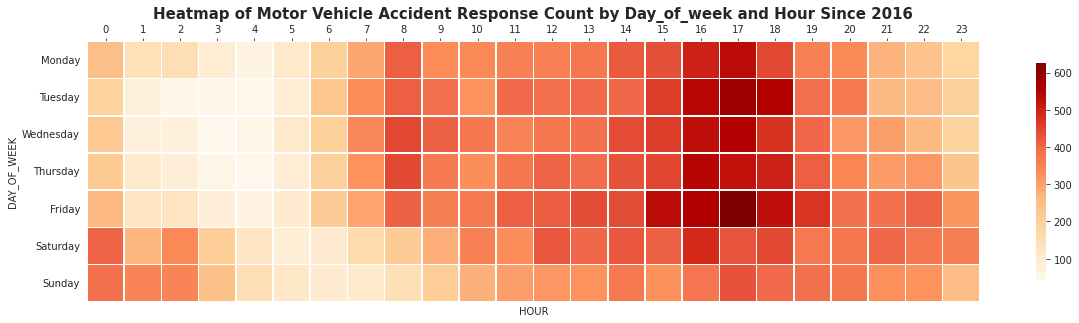

In [529]:
sns.set_context({"figure.figsize":(20,5)})
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response'].groupby(['DAY_OF_WEEK','HOUR']).INCIDENT_NUMBER.aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.8}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Motor Vehicle Accident Response Count by Day_of_week and Hour Since 2016', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   Motor Vehicle Accident Response were morelikely to occur between 16 and 18 pm from Monday to Thursday. On Friday, it occurred more frequent between 15 to 18 pm. At weekend's nights, the cases occurred more often than at weekday nights between 0 to 2 am.



###Larceny, the second frequent case type, were more likely to be reported at what time?

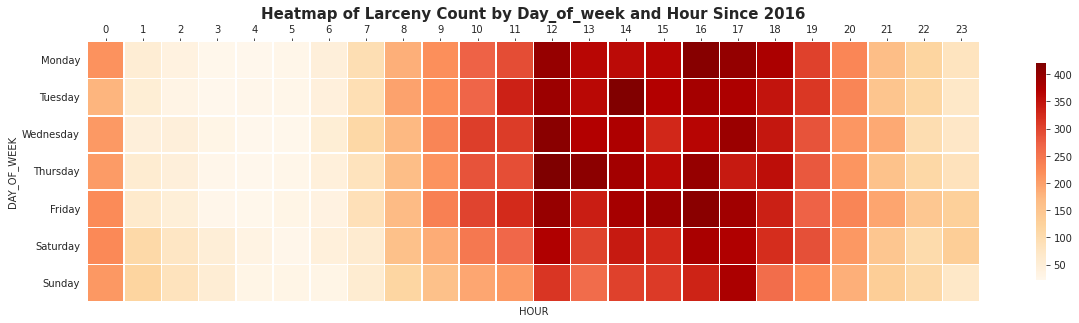

In [532]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Larceny'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.8}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Larceny Count by Day_of_week and Hour Since 2016', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   For larceny cases, they occurred generally in afternoons, especially on weekdays, however, the cases also happened at 0 am a lot.


###Medical Assitance, the third frequent case type, were more likely to be reported at what time?

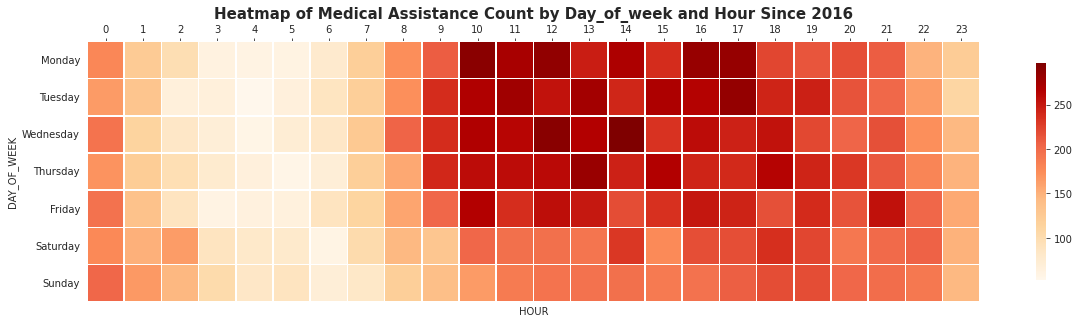

In [535]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Medical Assistance'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.8}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Medical Assistance Count by Day_of_week and Hour Since 2016', fontdict= {'fontsize':15, 'fontweight':'bold'});



*   Medical Assistance case more often occurred in daytime of weekdays.



## Analysis on Street

###Top 10 frequent streets

In [ ]:
street_rank = Crimes_all_years.groupby('STREET').INCIDENT_NUMBER.agg(count='count').sort_values(by='count',ascending=False)[:10]
street_rank

,count
STREET,
WASHINGTON ST,18692
BLUE HILL AVE,9284
...,...
COMMONWEALTH AVE,4985
HYDE PARK AVE,4700


###Motor Vehicle Accident were more likely to occur on which street？

In [ ]:
Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

,count
STREET,
WASHINGTON ST,1806
BLUE HILL AVE,1620
DORCHESTER AVE,996
CENTRE ST,795
HYDE PARK AVE,764


###Larceny were more likely to occur on which street？

In [ ]:
Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Larceny'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

,count
STREET,
WASHINGTON ST,2696
BOYLSTON ST,2533
NEWBURY ST,1223
HUNTINGTON AVE,992
TREMONT ST,747


###Medical Assistance cases were more likely to occur on which street？

In [ ]:
Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Medical Assistance'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

,count
STREET,
WASHINGTON ST,1358
CENTRE ST,526
BLUE HILL AVE,507
MASSACHUSETTS AVE,462
DORCHESTER AVE,448


## Analysis on District 

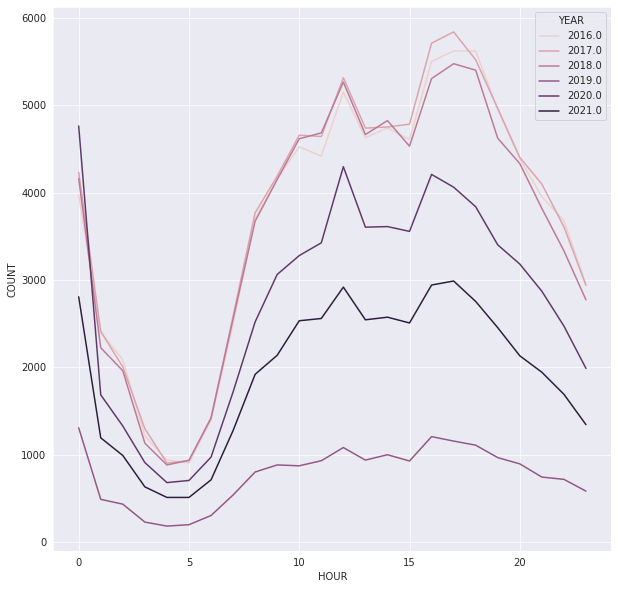

In [ ]:
crimes_weekday_hour = Crimes_all_years.groupby(['HOUR','YEAR'])['index'].aggregate(COUNT = 'count')
sns.set_context({"figure.figsize":(10,10)})
ax = sns.lineplot(data=crimes_weekday_hour,x='HOUR',y='COUNT',hue='YEAR');

Text(0.5, 1.0, 'Heatmap of District by Year')

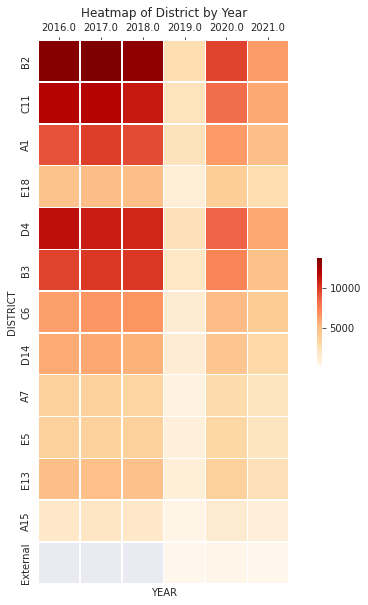

In [ ]:

crimes_District_year = Crimes_all_years.groupby(['DISTRICT','YEAR'])['index'].aggregate('count').unstack()
crimes_District_year = crimes_District_year.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_year,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Year')

Text(0.5, 1.0, 'Heatmap of District by Month')

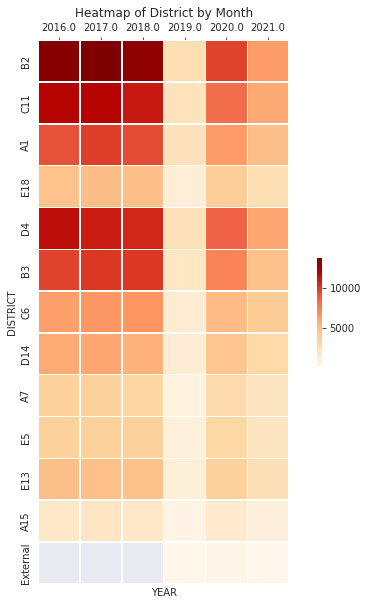

In [ ]:

crimes_District_month = Crimes_all_years.groupby(['DISTRICT','MONTH'])['index'].aggregate('count').unstack()
crimes_District_month = crimes_District_year.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_month,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Month')

Text(0.5, 1.0, 'Heatmap of District by Season')

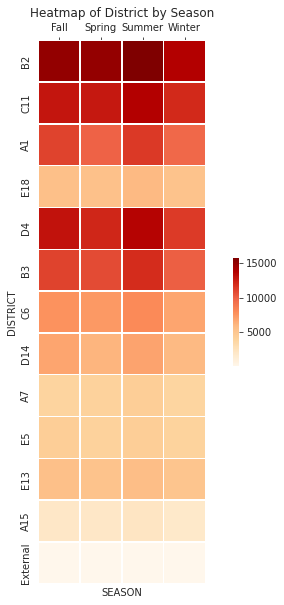

In [ ]:

crimes_District_season = Crimes_all_years.groupby(['DISTRICT','SEASON'])['index'].aggregate('count').unstack()
crimes_District_season = crimes_District_season.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_season,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Season')


Text(0.5, 1.0, 'Heatmap of District by day of week')

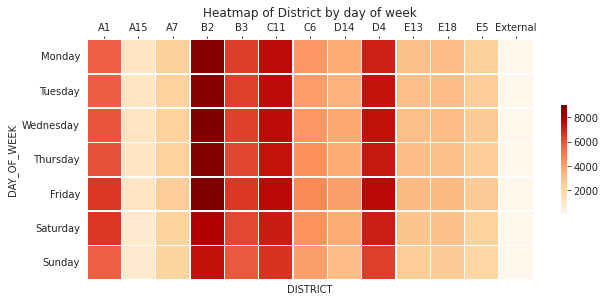

In [ ]:

crimes_District_weeksdays = Crimes_all_years.groupby(['DAY_OF_WEEK','DISTRICT'])['index'].aggregate('count').unstack()
crimes_District_weeksdays = crimes_District_weeksdays.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_District_weeksdays,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by day of week')

In [ ]:
Crimes_all_years['Holiday']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12]),'Holiday']=1
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([1,2,3,4,5,6,7,8,9,10,11]),'Holiday']=0
Crime_all_years.info()

NameError: ignored

In [ ]:
mydate=Crime_all_years['OCCURRED_ON_DATE']
DATE = []

for date in mydate:
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    DATE.append([year, month, day])
    

Crime_all_years['DATE']=DATE

Holiday=[]

month=Crime_all_years['MONTH']
day=Crime_all_years['DAY']
for var in month:
  if var ==12:
   for d in day:
     if d == 24:
      Holiday.append(1)
     else:
      Holiday.append(0)


## Mark Cluster Map

In [ ]:
df=pd.read_csv("/content/crimes_all_years.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df1 = df.sort_values(by='DISTRICT').reset_index()

In [ ]:
limit = 200
df1 = df1.iloc[0:limit, :]

In [ ]:
df1=df1.dropna(subset=['Long'])
df=df.dropna(subset=['Lat'])

In [ ]:
df1= df1[df1.Lat != 0.0]
df1

,index,Unnamed: 0,...,Long,Location
0,156267,3240,...,-71.059281,"(42.35648631, -71.05928145)"
1,393731,20696,...,-71.062299,"(42.3616450192536, -71.062299492688)"
...,...,...,...,...,...
198,63968,10371,...,-71.060880,"(42.35512339, -71.06087980)"
199,260082,5717,...,-71.065708,"(42.34767084, -71.06570791)"


In [ ]:
df1[df1.Long==0.0]
df1[df1.Lat==0.0]

,index,Unnamed: 0,...,Long,Location


In [ ]:
latitude = 42.3601
longitude = -71.0589
boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)
boston_map

In [ ]:
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df1.Lat, df1.Long):
 incidents.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=5, 
 color='yellow',
 fill=True,
 fill_color='blue',
 fill_opacity=0.6
 )
)
boston_map.add_child(incidents)

In [ ]:
incidents = folium.map.FeatureGroup()
for lat, lng, code,year in zip(df1.Lat, df1.Long,df1.OFFENSE_CODE_GROUP,df1.YEAR):
 incidents.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=5, 
 color='yellow',
 fill=True,
 fill_color='red',
 fill_opacity=0.6
   )
 )
latitudes = list(df1.Lat)
longitudes = list(df1.Long)
labels = list(df1.OFFENSE_CODE_GROUP)
years=list(df1.YEAR)
for lat, lng, labels,year in zip(latitudes, longitudes, labels,years):
  folium.Marker([lat, lng], popup='{}, {}'.format(labels,year)).add_to(boston_map) 
 

boston_map.add_child(incidents)
 

In [ ]:
from folium import plugins
boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(boston_map)
for lat, lng, label,year in zip(df1.Lat, df1.Long, df1.OFFENSE_CODE_GROUP,df1.YEAR):
 folium.Marker(
 location=[lat, lng],
 icon=None,
 popup='{}, {}'.format(label,year),
 ).add_to(incidents)
# display map
boston_map

# Conclusion

## Findings

## Suggestions